### One hot encoding: Variable with Many categories

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("train_mercedez.csv", usecols = ['X1','X2','X3','X4','X5','X6'])
data.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [2]:
for col in data.columns:
    print(col,":",len(data[col].unique()), "labels")

X1 : 27 labels
X2 : 44 labels
X3 : 7 labels
X4 : 4 labels
X5 : 29 labels
X6 : 12 labels


In [3]:
pd.get_dummies(data, drop_first = True).shape

(4209, 117)

In [4]:
data.X2.value_counts().sort_values(ascending = False).head(20)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
i       25
k       25
b       21
ao      20
ag      19
z       19
Name: X2, dtype: int64

In [5]:
top_10 = [x for x in data.X2.value_counts().sort_values(ascending = False).head(10).index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [6]:
for label in top_10:
    data[label] = np.where(data["X2"] == label, 1,0)
data[["X2"] + top_10].head(40)

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,at,0,0,0,0,0,0,0,0,0,0
1,av,0,0,0,0,0,0,0,0,0,0
2,n,0,0,0,0,0,0,1,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,n,0,0,0,0,0,0,1,0,0,0
5,e,0,0,0,0,0,0,0,0,0,1
6,e,0,0,0,0,0,0,0,0,0,1
7,as,1,0,0,0,0,0,0,0,0,0
8,as,1,0,0,0,0,0,0,0,0,0
9,aq,0,0,0,0,0,0,0,0,0,0


In [7]:
def one_hot_top_x(df,variable,top_x_labels):
    for label in top_x_labels:
        df[variable + '_' + label] = np.where(data[variable] == label, 1,0)

data = pd.read_csv("train_mercedez.csv", usecols = ['X1','X2','X3','X4','X5','X6'])
one_hot_top_x(data,"X2",top_10)
data.head()

    

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,1,0,0,0


In [8]:
#for X1 we have to perform
top_10 = [x for x in data.X1.value_counts().sort_values(ascending = False).head(10).index]
one_hot_top_x(data,"X1",top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
### Encoding by Frequency or High Count:
# Another way to refer to variables that have a multitude of categories, is to call them variables with high cardinality.


In [10]:
df = pd.read_csv("train_mercedez.csv", usecols = ["X1","X2"])
df.head()

,X1,X2
0,v,at
1,t,av
2,w,n
3,t,n
4,v,n


In [11]:
df.shape

(4209, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      4209 non-null   object
 1   X2      4209 non-null   object
dtypes: object(2)
memory usage: 65.9+ KB


In [13]:
pd.get_dummies(df).shape

(4209, 71)

In [14]:
len(df["X1"].unique())

27

In [15]:
len(df["X2"].unique())

44

In [16]:
for col in df.columns[0:]:
    print(col,":",len(df[col].unique()),"labels")

X1 : 27 labels
X2 : 44 labels


In [17]:
df.X2.value_counts().to_dict()

{'as': 1659,
 'ae': 496,
 'ai': 415,
 'm': 367,
 'ak': 265,
 'r': 153,
 'n': 137,
 's': 94,
 'f': 87,
 'e': 81,
 'aq': 63,
 'ay': 54,
 'a': 47,
 't': 29,
 'i': 25,
 'k': 25,
 'b': 21,
 'ao': 20,
 'ag': 19,
 'z': 19,
 'd': 18,
 'ac': 13,
 'g': 12,
 'y': 11,
 'ap': 11,
 'x': 10,
 'aw': 8,
 'h': 6,
 'at': 6,
 'q': 5,
 'an': 5,
 'al': 5,
 'p': 4,
 'ah': 4,
 'av': 4,
 'au': 3,
 'l': 1,
 'c': 1,
 'o': 1,
 'ar': 1,
 'af': 1,
 'j': 1,
 'aa': 1,
 'am': 1}

In [18]:
df_frequency = df.X2.value_counts().to_dict()
df.X2 = df.X2.map(df_frequency)
df.head()

,X1,X2
0,v,6
1,t,4
2,w,137
3,t,137
4,v,137


In [19]:
import pandas as pd
import datetime

In [20]:
df_base = datetime.datetime.today()
df_date_list = [df_base - datetime.timedelta(days = x) for x in range (0,20)]
df = pd.DataFrame(df_date_list)
df.columns = ["Day"]
df.head()

,Day
0,2021-08-12 19:39:07.774382
1,2021-08-11 19:39:07.774382
2,2021-08-10 19:39:07.774382
3,2021-08-09 19:39:07.774382
4,2021-08-08 19:39:07.774382


In [21]:
df["day_of_week"] = df["Day"].dt.day_name()
df.head()

,Day,day_of_week
0,2021-08-12 19:39:07.774382,Thursday
1,2021-08-11 19:39:07.774382,Wednesday
2,2021-08-10 19:39:07.774382,Tuesday
3,2021-08-09 19:39:07.774382,Monday
4,2021-08-08 19:39:07.774382,Sunday


In [22]:
weekday_map = {"Monday":1,
               "Tuesday":2,
               "Wednesday":3,
               "Thursday":4,
               "Friday":5,
               "Saturday":6,
               "Sunday":7}
df["day_ordinal"] = df.day_of_week.map(weekday_map)
df.head()


,Day,day_of_week,day_ordinal
0,2021-08-12 19:39:07.774382,Thursday,4
1,2021-08-11 19:39:07.774382,Wednesday,3
2,2021-08-10 19:39:07.774382,Tuesday,2
3,2021-08-09 19:39:07.774382,Monday,1
4,2021-08-08 19:39:07.774382,Sunday,7


In [23]:
# Live feature engineering - Day1
#Why is data missing..?: Hesitation in putting down the information; survey info are not that valid; and mainly because of human
# error. the way to fix the missing data is based on the dataset itself, for this the dataset should be considered from multiple
# sources. Continous data will be missing, categorical data will also be missing. 
# What are the different types of missing data..?MCAR: that is 'missing completely at random', there is absolutely no relationship
# between the data missing and any other values, within the dataset, those missing points are a random subset of the data.
# the second data missing,, missing data not at random, also known as 'systematic missing values', relationships exists between
# the missing values and the other observed values. and the third type is 'Missing At Random', 
 

In [24]:
import pandas as pd
df = pd.read_csv("train_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
WikiId           2
Name_wiki        2
Age_wiki         4
Hometown         2
Boarded          2
Destination      2
Lifeboat       546
Body           804
Class            2
dtype: int64

In [26]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,...,NaN,284.0,"and maid, Miss Amelie ""Amelia"" Icard",38.0,"New York, New York, US",Southampton,"New York, New York, US",6,NaN,1.0
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,...,NaN,283.0,"Stone, Mrs. Martha Evelyn (née Stevens)",62.0,"New York, New York, US",Southampton,"New York, New York, US",6,NaN,1.0


In [27]:
import numpy as np
df["cabin_null"] = np.where(df["Cabin"].isnull(),1,0)

#find the percentage of null values
df["cabin_null"].mean()


0.7710437710437711

In [28]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class', 'cabin_null'],
      dtype='object')

In [29]:
df.groupby(["Survived"])["cabin_null"].mean()

Survived
0.0    0.876138
1.0    0.602339
Name: cabin_null, dtype: float64

In [30]:
#All the techniques of handling missing values: 1. Mean Median Mode replacement. 2. Random sample Imputation, 
# 3. Capturing NaN value with a new feature. 4. End of distribution imputation. 5.Arbitrary Imputation, 6. Frequent categories in Imputation
# 7. Random  sample imputation.

In [31]:
#Mean Median Mode Imputation: When to apply..? this method has the assumption that the data missing is MCAR(missing completely at random)
#replacing the nan value with the most frequent occurence of the variable. 


In [32]:
df = pd.read_csv("train_titanic.csv", usecols = ["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0.0,22.0,7.2500
1,1.0,38.0,71.2833
2,1.0,26.0,7.9250
3,1.0,35.0,53.1000
4,0.0,35.0,8.0500


In [33]:
# LEts see the percentage of missing values.

df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [34]:
median = df["Age"].median()
print(median)

28.0


In [35]:
def impute_Nan(df,feature,median):
    df[feature + "_median"] = df[feature].fillna(median)
impute_Nan(df,"Age",median)
df.head()


,Survived,Age,Fare,Age_median
0,0.0,22.0,7.2500,22.0
1,1.0,38.0,71.2833,38.0
2,1.0,26.0,7.9250,26.0
3,1.0,35.0,53.1000,35.0
4,0.0,35.0,8.0500,35.0


In [36]:
df.describe()

,Survived,Age,Fare,Age_median
count,891.000000,714.000000,891.000000,891.000000
mean,0.383838,29.699118,32.204208,29.361582
std,0.486592,14.526497,49.693429,13.019697
min,0.000000,0.420000,0.000000,0.420000
25%,0.000000,20.125000,7.910400,22.000000
50%,0.000000,28.000000,14.454200,28.000000
75%,1.000000,38.000000,31.000000,35.000000
max,1.000000,80.000000,512.329200,80.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Age         714 non-null    float64
 2   Fare        891 non-null    float64
 3   Age_median  891 non-null    float64
dtypes: float64(4)
memory usage: 28.0 KB


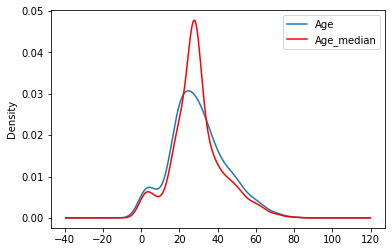

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df["Age"].plot(kind = 'kde', ax = ax)
df.Age_median.plot(kind = "kde", ax = ax, color = "red")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels,loc = "best")

In [39]:
# Advantages and Disadv of mean median imputations; Adv:Is easy to implement, robust to outliers, much faster, 
# Disadv: change or distortion in the variance of data, there will be an impact in correlation.

In [40]:
#Random Sample Imputation: using the random observation from the dataset, replace it with the missing value.It should be used 
# when the data is MCAR
import pandas as pd
df = pd.read_csv("train_titanic.csv", usecols = ["Age","Survived","Fare"])
df.head()

,Survived,Age,Fare
0,0.0,22.0,7.2500
1,1.0,38.0,71.2833
2,1.0,26.0,7.9250
3,1.0,35.0,53.1000
4,0.0,35.0,8.0500


In [41]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [42]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [43]:
median = df["Age"].median()
print(median)

28.0


In [44]:
df["Age"].dropna().sample(df["Age"].isnull().sum(), random_state = 0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [45]:
def impute_nan(df,feature,median):
    df[feature + "_median"] = df[feature].fillna(median)
    df[feature + "_random"] = df[feature]
    random_sample = df[feature].dropna().sample(df[feature].isnull().sum(), random_state = 0)
    #pandas need to have the same index inorder to merge the dataset
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature + "_random"] = random_sample
impute_nan(df,"Age",median)

In [46]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0.0,22.0,7.2500,22.0,22.0
1,1.0,38.0,71.2833,38.0,38.0
2,1.0,26.0,7.9250,26.0,26.0
3,1.0,35.0,53.1000,35.0,35.0
4,0.0,35.0,8.0500,35.0,35.0


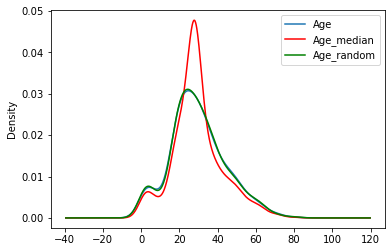

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df["Age"].plot(kind = 'kde', ax = ax)
df.Age_median.plot(kind = "kde", ax = ax, color = "red")
df.Age_random.plot(kind = "kde", ax = ax, color = "green")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels,loc = "best")


In [48]:
# Adv: Easy to implement, less distortion in variance
# Disad: in every situation randomness wont work.

### 3rd Technique: Capturing nan values with a new feature.
it works well if the data is not missing completely at random. 

In [49]:
df = pd.read_csv("train_titanic.csv", usecols = ["Age","Survived","Fare"])
df.head()

,Survived,Age,Fare
0,0.0,22.0,7.2500
1,1.0,38.0,71.2833
2,1.0,26.0,7.9250
3,1.0,35.0,53.1000
4,0.0,35.0,8.0500


In [50]:
import numpy as np
df["Age_Nan"] = np.where(df["Age"].isnull(), 1,0)
df.head()

,Survived,Age,Fare,Age_Nan
0,0.0,22.0,7.2500,0
1,1.0,38.0,71.2833,0
2,1.0,26.0,7.9250,0
3,1.0,35.0,53.1000,0
4,0.0,35.0,8.0500,0


In [51]:
df.Age.median()

28.0

In [52]:
df["Age"].fillna(df.Age.median(), inplace = True)
df.head(50)

,Survived,Age,Fare,Age_Nan
0,0.0,22.0,7.2500,0
1,1.0,38.0,71.2833,0
2,1.0,26.0,7.9250,0
3,1.0,35.0,53.1000,0
4,0.0,35.0,8.0500,0
5,0.0,28.0,8.4583,1
6,0.0,54.0,51.8625,0
7,0.0,2.0,21.0750,0
8,1.0,27.0,11.1333,0
9,1.0,14.0,30.0708,0


In [53]:
#Adv: Easy to implement, captures the importance of missing values
#Disadv: creats additional features.

### End of Distribution imputation:

In [54]:
df = pd.read_csv("train_titanic.csv", usecols = ["Age","Survived","Fare"])
df.head()

,Survived,Age,Fare
0,0.0,22.0,7.2500
1,1.0,38.0,71.2833
2,1.0,26.0,7.9250
3,1.0,35.0,53.1000
4,0.0,35.0,8.0500


<AxesSubplot:>

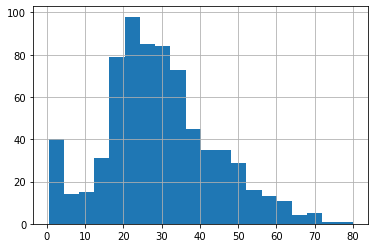

In [55]:
df.Age.hist(bins = 20)

In [56]:
extreme = df.Age.mean() + 3 * df.Age.std()
print(extreme)

73.27860964406095


In [57]:
median = df.Age.median()
print(median)

28.0


In [58]:
def impute_nan(df,feature,median,extreme):
    df[feature + "_endofdistribution"] = df[feature].fillna(extreme)
    df[feature] = df[feature].fillna(median)
impute_nan(df,"Age",median,extreme)
df.head(10)

,Survived,Age,Fare,Age_endofdistribution
0,0.0,22.0,7.2500,22.00000
1,1.0,38.0,71.2833,38.00000
2,1.0,26.0,7.9250,26.00000
3,1.0,35.0,53.1000,35.00000
4,0.0,35.0,8.0500,35.00000
5,0.0,28.0,8.4583,73.27861
6,0.0,54.0,51.8625,54.00000
7,0.0,2.0,21.0750,2.00000
8,1.0,27.0,11.1333,27.00000
9,1.0,14.0,30.0708,14.00000


<AxesSubplot:>

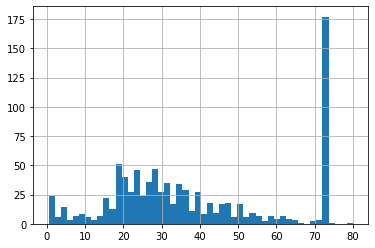

In [59]:
import seaborn as sns
df.Age_endofdistribution.hist(bins = 50)

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_endofdistribution'>

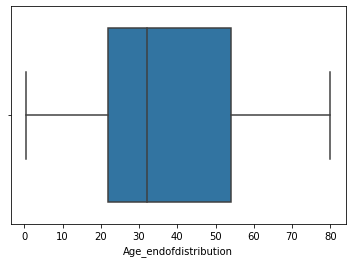

In [60]:
sns.boxplot("Age_endofdistribution", data = df)

### Arbitrary Value Imputation: it consists of replacing nan by an arbitray value.

In [61]:
import pandas as pd
df = pd.read_csv("train_titanic.csv", usecols = ["Age","Survived","Fare"])
df.head()

,Survived,Age,Fare
0,0.0,22.0,7.2500
1,1.0,38.0,71.2833
2,1.0,26.0,7.9250
3,1.0,35.0,53.1000
4,0.0,35.0,8.0500


In [62]:
# Arbitrary values should not be more frequently present.
def impute_nan(df,feature):
    df[feature + "_100"] = df[feature].fillna(100)
impute_nan(df,"Age")
df.head(100)

,Survived,Age,Fare,Age_100
0,0.0,22.0,7.2500,22.0
1,1.0,38.0,71.2833,38.0
2,1.0,26.0,7.9250,26.0
3,1.0,35.0,53.1000,35.0
4,0.0,35.0,8.0500,35.0
...,...,...,...,...
95,0.0,NaN,8.0500,100.0
96,0.0,71.0,34.6542,71.0
97,1.0,23.0,63.3583,23.0
98,1.0,34.0,23.0000,34.0


### Handling missing categorical values..?
# Frequent Category imputations..


In [63]:
import pandas as pd
data = pd.read_csv("train_adv house.csv", usecols = ["BsmtQual","FireplaceQu","GarageType","SalePrice"])
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [64]:
data.isnull().mean().sort_values(ascending = True)
# in Bsmt and Garage feature,,the number of missing value is less. replace it with the most frequent values.

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [65]:
data.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [66]:
data.GarageType.value_counts().index

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object')

In [67]:
data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [68]:
def impute_nan(data,feature):
    most_freq = data[feature].value_counts().index[0]
    data[feature].fillna(most_freq, inplace = True)
for feature in data.columns:
    impute_nan(data,feature)


In [69]:
data.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [70]:
#Adv: easy and faster way to implement.
#Dis: creates imbalance in the dataset. and it may use them in an over represented way. it distorts the relation of the most frequent label.

### ADDing a variable to capture Nan:


In [71]:
import pandas as pd
data = pd.read_csv("train_adv house.csv", usecols = ["BsmtQual","FireplaceQu","GarageType","SalePrice"])
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [72]:
import numpy as np
data["BsmtQual_nan"] = np.where(data["BsmtQual"].isnull(),1,0)  #this increases feature space.
data.head(100)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_nan
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
...,...,...,...,...,...
95,Gd,TA,BuiltIn,185000,0
96,Gd,NaN,Attchd,214000,0
97,TA,NaN,Attchd,94750,0
98,TA,NaN,Basment,83000,0


In [73]:
data.BsmtQual.mode()[0]

'TA'

In [74]:
freq = data["BsmtQual"].value_counts().index[0]
data["BsmtQual"].fillna(freq, inplace = True)
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_nan
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [78]:
print(data.FireplaceQu.isnull().sum())
data.FireplaceQu.mode()[0]

690


'Gd'

In [79]:

freq_1 = data["FireplaceQu"].value_counts().index[0]
data["FireplaceQu_nan"] = np.where(data["FireplaceQu"].isnull(),1,0)
data["FireplaceQu"].fillna(freq_1, inplace = True)
data.head() 

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_nan,FireplaceQu_nan
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### more frequent categories, then we will replace nan with altogether a new category.

In [80]:
import pandas as pd
data = pd.read_csv("train_adv house.csv", usecols = ["BsmtQual","FireplaceQu","GarageType","SalePrice"])
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [83]:
def impute_nan(data,feature):
    data[feature + "new_var"] = np.where(data[feature].isnull(), "Missing",data[feature])
for feature in ["BsmtQual","FireplaceQu","GarageType"]:
    impute_nan(data,feature)
data.head()


,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnew_var,FireplaceQunew_var,GarageTypenew_var
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [86]:
data.drop(["BsmtQual","FireplaceQu","GarageType"], axis = 1)

,SalePrice,BsmtQualnew_var,FireplaceQunew_var,GarageTypenew_var
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd


### Handle Categorical features:

In [88]:
import pandas as pd
dat = pd.read_csv("train_titanic.csv", usecols = ["Sex"])
dat.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [90]:
pd.get_dummies(dat, drop_first = True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [91]:
dat = pd.read_csv("train_titanic.csv", usecols = ["Sex","Embarked"])
dat.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [101]:
dat["Embarked"].unique()
dat.dropna(inplace = True)
dat.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [102]:
dat.drop("Sex", axis = 1)

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [104]:
pd.get_dummies(dat,drop_first = True).head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [107]:
#how to perform one hot encoding with many categories.
data_merc = pd.read_csv("train_mercedez.csv",usecols = ["X0","X1","X2","X3","X4","X5","X6"])
data_merc.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [108]:
for i in data_merc.columns:
    print(data_merc[i].value_counts())

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
am     18
i      18
aq     18
u      17
aw     16
l      16
ad     14
k      11
au     11
b      11
as     10
r      10
bc      6
ao      4
c       3
q       2
aa      2
ab      1
g       1
ac      1
Name: X0, dtype: int64
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
d       3
ab      3
q       3
Name: X1, dtype: int64
as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
i       25
k       25
b       21
ao      20
ag      19
z    

In [114]:
data_merc["X0"].value_counts()
data_merc["X0"].unique()


array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [116]:
for i in data_merc.columns:
    print(i,":",len(data_merc[i].unique()), "labels")

X0 : 47 labels
X1 : 27 labels
X2 : 44 labels
X3 : 7 labels
X4 : 4 labels
X5 : 29 labels
X6 : 12 labels


In [127]:
lst_10 = data_merc.X1.value_counts().sort_values(ascending = False).head(10).index
lst_10

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [130]:
lst_10 = list(lst_10)
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [135]:
for categories in lst_10:
    data_merc[categories] = np.where(data_merc["X1"] == categories, 1,0)
data_merc

,X0,X1,X2,X3,X4,X5,X6,aa,s,b,l,v,r,i,a,c,o
0,k,v,at,a,d,u,j,0,0,0,0,1,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,0,1,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,0,0,0,0,0,0,0,0,0,1
4206,ak,v,r,a,d,aa,g,0,0,0,0,1,0,0,0,0,0
4207,al,r,e,f,d,aa,l,0,0,0,0,0,1,0,0,0,0


In [146]:
data_merc.head()

,X0,X1,X2,X3,X4,X5,X6,aa,s,b,l,v,r,i,a,c,o
0,k,v,at,a,d,u,j,0,0,0,0,1,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,1,0,0,0,0,0


In [163]:
lst_10.append("X1")
